In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import datetime as dt

In [2]:
df = pd.read_csv("../data/HEC_processed.csv", parse_dates=[0], index_col=0)

In [3]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [4]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
len(df)

2075259

In [6]:
df.describe()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


欠損値の線形補完

In [7]:
df.interpolate(method="time",inplace=True)

## 今回は2007年１月のデータだけを使います。

In [8]:
ts_gap = df["Global_active_power"][(df.index > dt.datetime(2007,1,1)) & (df.index < dt.datetime(2007,2,1) )]

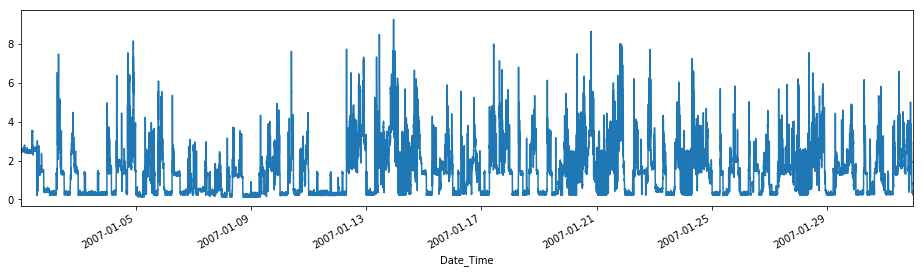

In [9]:
plt.figure(figsize=(16, 4))
ts_gap.plot()
plt.show()

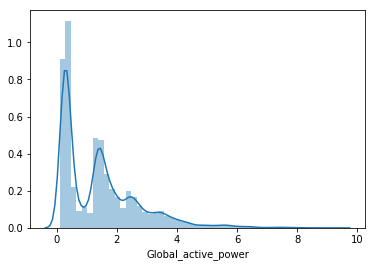

In [10]:
sns.distplot(ts_gap)
plt.show()

In [11]:
len(ts_gap)

44639

## Box-cox変換

In [12]:
ts_gap_bct= stats.boxcox(ts_gap)

In [13]:
print(len(ts_gap_bct[0]))

44639


In [14]:
ts_gap_bct = pd.Series(ts_gap_bct[0], index=ts_gap.index)

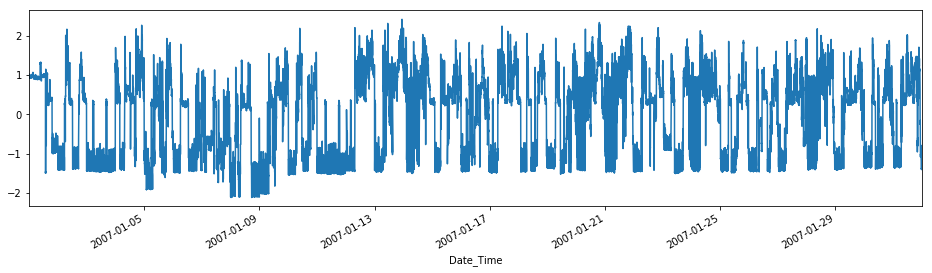

In [15]:
plt.figure(figsize=(16, 4))
ts_gap_bct.plot()
plt.show()

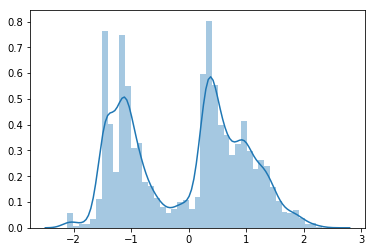

In [16]:
sns.distplot(ts_gap_bct)
plt.show()

# 季節・トレンド・残渣分解

<Figure size 1152x288 with 0 Axes>

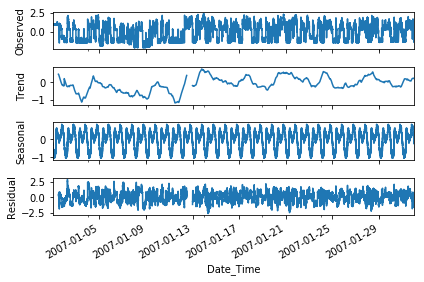

In [17]:
plt.figure(figsize=(16, 4))
res = sm.tsa.seasonal_decompose(ts_gap_bct, freq=60*24)
res.plot()
plt.show()

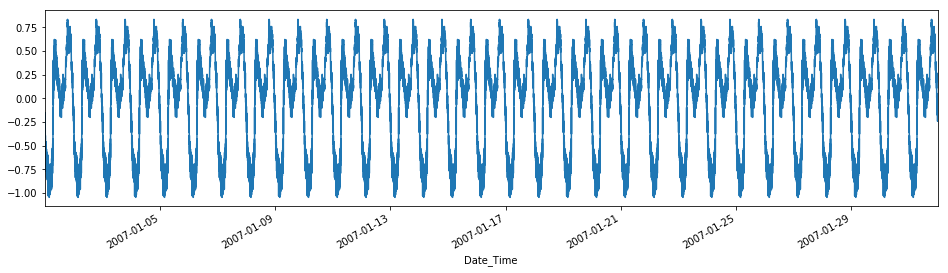

In [18]:
plt.figure(figsize=(16, 4))
res.seasonal.plot()
plt.show()

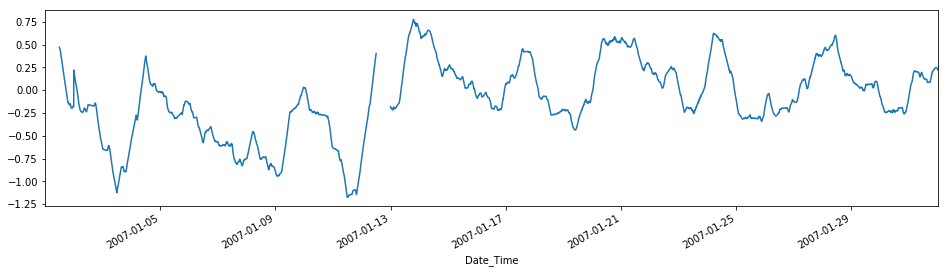

In [19]:
plt.figure(figsize=(16, 4))
res.trend.plot()
plt.show()

# 自己相関関数と偏自己相関関数 

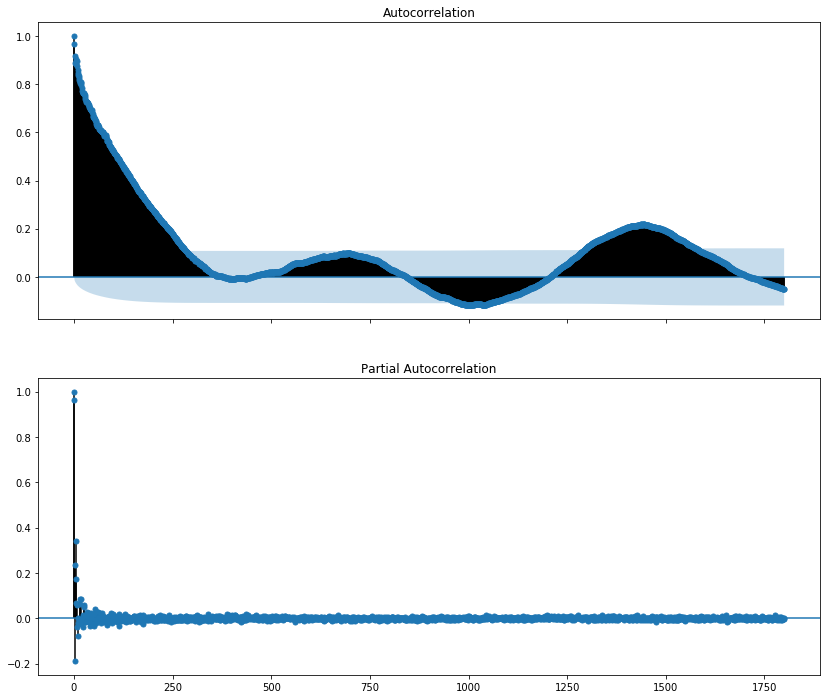

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(14,12))
sm.graphics.tsa.plot_acf(ts_gap_bct, lags=60*30, ax=ax1)
sm.graphics.tsa.plot_pacf(ts_gap_bct, lags=60*30, ax=ax2)
plt.show()